In [1]:
# PREAMBLE
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('ggplot')
import seaborn as sns
import re
import io
import os.path

In [3]:
### Network I/O

In [4]:
# PROCESS SAR METRICS
FIND_ETH0 = re.compile(".+ ens3 .+")
FIND_CPU = re.compile(".+ all .+")
BW_COLS = ["ts", "rxpck","txpck","rxkB","txkB"]
CPU_COLS = ["cpu"]
SAMPLES = 5

network_df = lambda fname: pd.read_fwf(io.StringIO("".join(filter(FIND_ETH0.match, open(fname)))), header=None)\
                             .loc[:,[0,3,4,5,6]]
cpu_df = lambda fname: pd.read_fwf(io.StringIO("".join(filter(FIND_CPU.match, open(fname)))), header=None)\
                             .loc[:,[8]]

async_no_ssl_networks = tuple(network_df(os.path.join("reports2", "async_no_ssl_no_sse-network.{}.sar.txt".format(i)))
                              for i in range(1,6))
async_yes_ssl_networks = tuple(network_df(os.path.join("reports2", "async_yes_ssl_no_sse-network.{}.sar.txt".format(i)))
                               for i in range(1,6))
async_yes_sse_networks = tuple(network_df(os.path.join("reports2", "async_yes_ssl_yes_sse-network.{}.sar.txt".format(i)))
                               for i in range(1,6))

async_no_ssl_cpus = tuple(cpu_df(os.path.join("reports2", "async_no_ssl_no_sse-cpu.{}.sar.txt".format(i)))
                          for i in range(1, SAMPLES+1))
async_yes_ssl_cpus = tuple(cpu_df(os.path.join("reports2", "async_yes_ssl_no_sse-cpu.{}.sar.txt".format(i)))
                           for i in range(1, SAMPLES+1))
async_yes_sse_cpus = tuple(cpu_df(os.path.join("reports2", "async_yes_ssl_yes_sse-cpu.{}.sar.txt".format(i)))
                           for i in range(1, SAMPLES+1))

for df in async_no_ssl_networks + async_yes_sse_networks + async_yes_ssl_networks:
    df.columns = BW_COLS

for df in async_no_ssl_cpus + async_yes_sse_cpus + async_yes_ssl_cpus:
    df.columns = CPU_COLS

async_no_ssl_cpu = pd.DataFrame({"s{}".format(i): 100-df.cpu for (i,df) in enumerate(async_no_ssl_cpus, 1)})
async_no_ssl_cpu.df_name = "no_ssl_cpu"
async_yes_ssl_cpu = pd.DataFrame({"s{}".format(i): 100-df.cpu for (i,df) in enumerate(async_yes_ssl_cpus, 1)})
async_yes_ssl_cpu.df_name = "yes_ssl_cpu"
async_yes_sse_cpu = pd.DataFrame({"s{}".format(i): 100-df.cpu for (i,df) in enumerate(async_yes_sse_cpus, 1)})
async_yes_sse_cpu.df_name = "yes_sse_cpu"

async_no_ssl_network = pd.DataFrame({"s{}".format(i): df.txkB for (i,df) in enumerate(async_no_ssl_networks, 1)})
async_no_ssl_network.df_name = "no_ssl_network"
async_yes_ssl_network = pd.DataFrame({"s{}".format(i): df.txkB for (i,df) in enumerate(async_yes_ssl_networks, 1)})
async_yes_ssl_network.df_name = "yes_ssl_network"
async_yes_sse_network = pd.DataFrame({"s{}".format(i): df.txkB for (i,df) in enumerate(async_yes_sse_networks, 1)})
async_yes_sse_network.df_name = "yes_sse_network"

async_cpu = (async_no_ssl_cpu, async_yes_ssl_cpu, async_yes_sse_cpu)
async_network = (async_no_ssl_network, async_yes_ssl_network, async_yes_sse_network)

for df in async_cpu + async_network:
    df["sample_mean"] = df[list(map("s{}".format, range(1, SAMPLES+1)))].mean(1)

In [5]:
summary = pd.DataFrame({df.df_name: df.sample_mean for df in async_cpu + async_network}).loc[13:425,]

In [6]:
ddd = summary[['no_ssl_cpu', 'yes_sse_cpu','yes_ssl_cpu']]
ddd["t"] = ddd.index
ddd = pd.melt(ddd,"t")
ddd

/home/psoutham/.apps/anaconda3/envs/bunnies/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,t,variable,value
0,13,no_ssl_cpu,1.260
1,14,no_ssl_cpu,1.378
2,15,no_ssl_cpu,1.382
3,16,no_ssl_cpu,1.310
4,17,no_ssl_cpu,1.408
5,18,no_ssl_cpu,1.388
6,19,no_ssl_cpu,1.450
7,20,no_ssl_cpu,1.490
8,21,no_ssl_cpu,1.536
9,22,no_ssl_cpu,1.406


In [7]:
summary.index
summary.columns

Index(['no_ssl_cpu', 'no_ssl_network', 'yes_sse_cpu', 'yes_sse_network',
       'yes_ssl_cpu', 'yes_ssl_network'],
      dtype='object')

In [8]:
from ggplot import *

p = ggplot(aes(x='value', color='variable', fill='variable'), data=pd.melt(summary[['no_ssl_cpu', 'yes_sse_cpu',
       'yes_ssl_cpu']]))
p.title = "CPU Utilization Upon Transfer to S3"


In [28]:
ggplot(aes(x='t', y='value', color='variable', fill='variable'), data=ddd) +geom_line() +\
    stat_smooth(colour='white', span=0.2) +\
    xlab("T") + ylab("CPU") + ggtitle("CPU Utilization Upon Transfer to S3") + theme_xkcd()

/home/psoutham/.apps/anaconda3/envs/bunnies/lib/python3.5/site-packages/ggplot/ggplot.py:154: RuntimeWarning: Setting "mpl.rcParams['examples.download']=True" raised an Exception: 'examples.download is not a valid rc parameter.See rcParams.keys() for a list of valid parameters.'
  warnings.warn(msg, RuntimeWarning)
/home/psoutham/.apps/anaconda3/envs/bunnies/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/psoutham/.apps/anaconda3/envs/bunnies/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


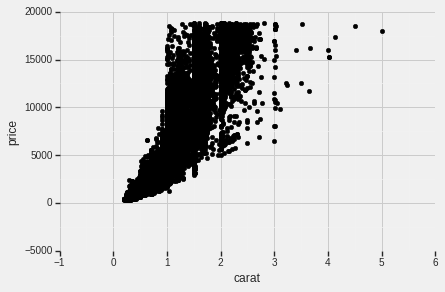

<ggplot: (-9223363243306157340)>

In [30]:
ggplot(aes('carat', 'price'), data=diamonds) + geom_point() + theme_538()

In [ ]:
p + geom_density(alpha=0.6)

In [ ]:
p+geom_histogram(alpha=0.6)

In [ ]:
p.ytick_labels

In [ ]:
plt.figure()
summary_plt = summary.plot(
    secondary_y=[df.df_name for df in async_cpu], 
    mark_right=True,
    figsize=(16*2, 9*2)
)
summary_plt.set_ylabel("txkB/s")
summary_plt.set_ybound(0,750000)
summary_plt.right_ax.set_ylabel("cpu utilization")
summary_plt.right_ax.set_ybound(0,100)
summary_plt.set_title("Transferring 8 concurrent 30GB files")

#trend line for cpu

In [ ]:
summary.mean()

In [ ]:
summary[[df.df_name for df in async_cpu]].plot.hist(
    stacked=False, 
    alpha=0.5,
    orientation='horizontal'
)

In [ ]:
summary[[df.df_name for df in async_network]].plot.hist(
    stacked=False, 
    alpha=0.5,
    orientation='horizontal'
)

In [ ]:
summary[[df.df_name for df in async_cpu]].plot.box(vert=False)

In [ ]:
summary.plot.area(
    secondary_y=[df.df_name for df in async_cpu], 
    mark_right=True,
    alpha=.5,
    stacked=False
)

In [ ]:
summary[["yes_ssl_cpu", "yes_sse_cpu", "no_ssl_cpu"]].plot.kde()
# change x value, use for bonnie++ test results

In [ ]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(summary.yes_sse_cpu)
autocorrelation_plot(summary.yes_ssl_cpu)
autocorrelation_plot(summary.no_ssl_cpu)

In [ ]:
from pandas.tools.plotting import bootstrap_plot
bootstrap_plot(summary.yes_sse_cpu)

In [ ]:
summary.plot(subplots=True, figsize=(9,9))

In [ ]:
# PROCESS SAR METRICS
SAMPLES=8

single_no_ssl_networks = tuple(network_df(os.path.join("reports2", "single_no_ssl_no_sse-network.{}.sar.txt".format(i)))
                              for i in range(0, SAMPLES))
single_yes_ssl_networks = tuple(network_df(os.path.join("reports2", "single_yes_ssl_no_sse-network.{}.sar.txt".format(i)))
                               for i in range(0, SAMPLES))
single_yes_sse_networks = tuple(network_df(os.path.join("reports2", "single_yes_ssl_yes_sse-network.{}.sar.txt".format(i)))
                               for i in range(0, SAMPLES))

single_no_ssl_cpus = tuple(cpu_df(os.path.join("reports2", "single_no_ssl_no_sse-cpu.{}.sar.txt".format(i)))
                          for i in range(0, SAMPLES))
single_yes_ssl_cpus = tuple(cpu_df(os.path.join("reports2", "single_yes_ssl_no_sse-cpu.{}.sar.txt".format(i)))
                           for i in range(0, SAMPLES))
single_yes_sse_cpus = tuple(cpu_df(os.path.join("reports2", "single_yes_ssl_yes_sse-cpu.{}.sar.txt".format(i)))
                           for i in range(0, SAMPLES))

for df in single_no_ssl_networks + single_yes_sse_networks + single_yes_ssl_networks:
    df.columns = BW_COLS

for df in single_no_ssl_cpus + single_yes_sse_cpus + single_yes_ssl_cpus:
    df.columns = CPU_COLS

single_no_ssl_cpu = pd.DataFrame({"s{}".format(i): 100-df.cpu for (i,df) in enumerate(single_no_ssl_cpus)})
single_no_ssl_cpu.df_name = "no_ssl_cpu"
single_yes_ssl_cpu = pd.DataFrame({"s{}".format(i): 100-df.cpu for (i,df) in enumerate(single_yes_ssl_cpus)})
single_yes_ssl_cpu.df_name = "yes_ssl_cpu"
single_yes_sse_cpu = pd.DataFrame({"s{}".format(i): 100-df.cpu for (i,df) in enumerate(single_yes_sse_cpus)})
single_yes_sse_cpu.df_name = "yes_sse_cpu"

single_no_ssl_network = pd.DataFrame({"s{}".format(i): df.txkB for (i,df) in enumerate(single_no_ssl_networks)})
single_no_ssl_network.df_name = "no_ssl_network"
single_yes_ssl_network = pd.DataFrame({"s{}".format(i): df.txkB for (i,df) in enumerate(single_yes_ssl_networks)})
single_yes_ssl_network.df_name = "yes_ssl_network"
single_yes_sse_network = pd.DataFrame({"s{}".format(i): df.txkB for (i,df) in enumerate(single_yes_sse_networks)})
single_yes_sse_network.df_name = "yes_sse_network"

single_cpu = (single_no_ssl_cpu, single_yes_ssl_cpu, single_yes_sse_cpu)
single_network = (single_no_ssl_network, single_yes_ssl_network, single_yes_sse_network)

for df in single_cpu + single_network:
    df["sample_mean"] = df[list(map("s{}".format, range(0, SAMPLES)))].mean(1)

In [ ]:
plt.figure()

single_summary = pd.DataFrame({df.df_name: df.sample_mean for df in single_cpu + single_network}).loc[5:90,]
single_summary_plt = single_summary.plot(
    secondary_y=[df.df_name for df in single_cpu], 
    mark_right=True,
    figsize=(16, 9)
)
single_summary_plt.set_ybound(0,400000)
single_summary_plt.set_ylabel("txkB/s")
single_summary_plt.right_ax.set_ylabel("cpu utilization")
single_summary_plt.right_ax.set_ybound(0,100)
single_summary_plt.set_title("Transferring 1 30GB file")

In [ ]:
single_summary.mean()

### Disk I/O

In [ ]:
samples = []
for dev in ("eph-p", "eph-e", "io-e", "io-p"): #"gpt-e", 
    with open(os.path.join("reports", "bonnie.{}.txt".format(dev)), "r") as f:
        samples.extend(dev.split("-") + l.strip().split(",") for l in f.readlines()[1:])

In [ ]:
bonnie = pd.DataFrame(samples)[[0,1,11, 12, 13,17, 18, 39, 40,]+list(range(42,50))]
bonnie.columns=["dev_type", "enc_flag", "put_block", "put_block_cpu", "rewrite", "get_block",
"get_block_cpu", "put_block_latency","rewrite_latency",
"get_block_latency","seeks_latency","seq_create_latency","seq_stat_latency","seq_del_latency","ran_create_latency","ran_stat_latency","ran_del_latency"]

for l in ("put_block", "get_block", "put_block_cpu", "get_block_cpu"):
    bonnie[l] = bonnie[l].apply(int)
    
for l in ("put_block_latency", "get_block_latency"):
    bonnie[l] = bonnie[l].apply(lambda x: int(x[:-2]) if x[-2:] == "us" else int(x[:-2])*1000)


In [ ]:
bonnie.boxplot(by=["dev_type", "enc_flag"], 
           column=["put_block", "get_block"], 
           figsize=(16,9))

In [ ]:
bonnie[bonnie.dev_type == "eph"].boxplot(by="enc_flag", 
           column=["put_block", "get_block"],           
           figsize=(16,9))

In [ ]:
bonnie[bonnie.dev_type == "io"].boxplot(by="enc_flag", 
           column="get_block",           
           figsize=(16,9))

In [ ]:
g = sns.factorplot(x="dev_type", y="put_block", hue="enc_flag", data=bonnie,
                  kind="bar", size=9,palette=['r','g'])
g.despine(left=True)

In [ ]:
g = sns.factorplot(x="dev_type", y="get_block", hue="enc_flag", data=bonnie,
                  kind="bar", size=9,palette=['r','g'])
g.despine(left=True)

In [ ]:
sns.reset_defaults()
sns.set_style("whitegrid")
g = sns.boxplot(x="dev_type", y="get_block_cpu", hue="enc_flag", data=bonnie[bonnie.dev_type == "eph"],palette=['r','g'],width=.7)
g.set_title("Ephemerial relative CPU on READ\nLUKS(e) vs PlainText(p)")
g.set_ybound(5,15)
sns.despine(offset=5)

In [ ]:
sns.reset_defaults()
sns.set_style("whitegrid")
g = sns.boxplot(x="dev_type", y="put_block_cpu", hue="enc_flag", data=bonnie[bonnie.dev_type == "eph"],palette=['r','g'], width=.8)
g.set_title("Ephemerial relative CPU on WRITE\nLUKS(e) vs PlainText(p)")
g.set_ybound(25,35)
sns.despine(offset=5)

In [ ]:
sns.reset_defaults()
sns.set_style("whitegrid")
g = sns.boxplot(x="dev_type", y="get_block", hue="enc_flag", data=bonnie[bonnie.dev_type == "io"],palette=['g','r'], width=.8)
g.set_title("EBS relative Throughput on READ\nEncrypted(e) vs PlainText(p)")
sns.despine(offset=5)

In [ ]:
sns.reset_defaults()
sns.set_style("whitegrid")
g = sns.boxplot(x="dev_type", y="put_block", hue="enc_flag", data=bonnie[bonnie.dev_type == "io"],palette=['g','r'], width=.8)
g.set_title("EBS relative Throughput on WRITE\nEncrypted(e) vs PlainText(p)")
sns.despine(offset=5)

In [ ]:
sns.reset_defaults()
sns.set_style("whitegrid")
g = sns.boxplot(x="dev_type", y="put_block", hue="enc_flag", data=bonnie[bonnie.dev_type == "eph"],palette=['r','g'], width=.8)
g.set_title("Ephemerial relative Throughput on WRITE\nLUKS(e) vs PlainText(p)")
sns.despine(offset=5)

In [ ]:
sns.reset_defaults()
sns.set_style("whitegrid")
g = sns.boxplot(x="dev_type", y="get_block", hue="enc_flag", data=bonnie[bonnie.dev_type == "eph"],palette=['r','g'], width=.8)
g.set_title("Ephemerial relative Throughput on READ\nEncrypted(e) vs PlainText(p)")
sns.despine(offset=5)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))
_ = fig.suptitle("bonnie tests")
g_er = sns.boxplot(x="dev_type", y="get_block",
                hue="enc_flag", 
                data=bonnie[bonnie.dev_type == "eph"],
                palette=['r','g'],
                width=.8,
                ax=axes[0, 0])
g_er.set_title("Ephemerial relative Throughput on READ\nEncrypted(e) vs PlainText(p)")
g_er.set_xlabel("")
g_er.set_ylabel("blocks/sec")
g_ew = sns.boxplot(x="dev_type", y="put_block",
                hue="enc_flag",
                data=bonnie[bonnie.dev_type == "eph"],
                palette=['r','g'],
                width=.8,
                ax=axes[0, 1])
g_ew.set_title("Ephemerial relative Throughput on WRITE\nLUKS(e) vs PlainText(p)")
g_ew.set_xlabel("")
g_ew.set_ylabel("blocks/sec")

g_ir = sns.boxplot(x="dev_type", y="get_block",
                hue="enc_flag",
                data=bonnie[bonnie.dev_type == "io"],
                palette=['g','r'],
                width=.8,
                ax=axes[1, 0]
               )
g_ir.set_title("EBS relative Throughput on READ\nEncrypted(e) vs PlainText(p)")
g_ir.set_xlabel("")
g_ir.set_ylabel("blocks/sec")

g_iw = sns.boxplot(x="dev_type", y="put_block",
                hue="enc_flag",
                data=bonnie[bonnie.dev_type == "io"],
                palette=['g','r'],
                width=.8,
                ax=axes[1, 1]
               )
g_iw.set_title("EBS relative Throughput on WRITE\nEncrypted(e) vs PlainText(p)")
g_iw.set_xlabel("")
g_iw.set_ylabel("blocks/sec")

sns.despine(offset=5)
fig.subplots_adjust(hspace=0.4)